In [1]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *

In [2]:
import wandb
from fastai.callback.wandb import *

In [3]:
wandb.login()

In [4]:
wandb.login()

True

In [5]:
# 1. Start a new run
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1a', 
    job_type='basetrain', 
    tags=['base', 'census'], 
    name='modelA training',
    notes="Training modelA from which we'll take embeddings",
    reinit=True
)

In [6]:
dfA=pd.read_csv("../data/census-income.csv")
splitsA = RandomSplitter(valid_pct=0.2)(range_of(dfA))
toA = TabularPandas(dfA, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"],
                   y_names='salary',
                   splits=splitsA)
dlsA = toA.dataloaders(bs=128)
learnA = tabular_learner(dlsA, metrics=accuracy)

In [7]:
cbs=[WandbCallback(log="all", dataset_name="census-income", n_preds=128, seed=1), ReduceLROnPlateau(monitor='accuracy', min_delta=0.1, patience=2, min_lr=1e-8), SaveModelCallback()]
learnA.fit_one_cycle(10, cbs=cbs)

In [8]:
learnA.recorder.plot_loss()

In [9]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from fastcore.xtras import *

In [10]:
Path(".").ls()

(#9) [Path('02_transfer.ipynb'),Path('01_extract.ipynb'),Path('models'),Path('.ipynb_checkpoints'),Path('00_utils.ipynb'),Path('03_load_tests.ipynb'),Path('index.ipynb'),Path('Exp1(a).ipynb'),Path('wandb')]

In [11]:
Path("../results").ls()

(#1) [Path('../results/exp1a')]

In [12]:
Path("../results/exp1a").ls()

(#0) []

In [13]:
torch.save(learnA.model.state_dict(),"../results/exp1a/modelA_state_dict")

In [14]:
catdict = getcatdict(dfA)

In [15]:
catdict = getcatdict(dfA)
catdict

{'class of worker': [' Not in universe',
  ' Self-employed-not incorporated',
  ' Private',
  ' Local government',
  ' Federal government',
  ' Self-employed-incorporated',
  ' State government',
  ' Never worked',
  ' Without pay'],
 'education': [' High school graduate',
  ' Some college but no degree',
  ' 10th grade',
  ' Children',
  ' Bachelors degree(BA AB BS)',
  ' Masters degree(MA MS MEng MEd MSW MBA)',
  ' Less than 1st grade',
  ' Associates degree-academic program',
  ' 7th and 8th grade',
  ' 12th grade no diploma',
  ' Associates degree-occup /vocational',
  ' Prof school degree (MD DDS DVM LLB JD)',
  ' 5th or 6th grade',
  ' 11th grade',
  ' Doctorate degree(PhD EdD)',
  ' 9th grade',
  ' 1st 2nd 3rd or 4th grade'],
 'enroll in edu inst last wk': [' Not in universe',
  ' High school',
  ' College or university'],
 'marital stat': [' Widowed',
  ' Divorced',
  ' Never married',
  ' Married-civilian spouse present',
  ' Separated',
  ' Married-spouse absent',
  ' Married

In [16]:
learnA.model.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(18, 8)
  (2): Embedding(4, 3)
  (3): Embedding(8, 5)
  (4): Embedding(25, 10)
  (5): Embedding(16, 8)
  (6): Embedding(6, 4)
  (7): Embedding(11, 6)
  (8): Embedding(3, 3)
  (9): Embedding(4, 3)
  (10): Embedding(7, 5)
  (11): Embedding(9, 5)
  (12): Embedding(7, 5)
  (13): Embedding(7, 5)
  (14): Embedding(52, 15)
  (15): Embedding(39, 12)
  (16): Embedding(9, 5)
  (17): Embedding(11, 6)
  (18): Embedding(10, 6)
  (19): Embedding(11, 6)
  (20): Embedding(4, 3)
  (21): Embedding(5, 4)
  (22): Embedding(6, 4)
  (23): Embedding(44, 13)
  (24): Embedding(44, 13)
  (25): Embedding(44, 13)
  (26): Embedding(6, 4)
  (27): Embedding(4, 3)
)

In [17]:
catdict = getcatdict(dfA, add_na=True)
catdict

{'class of worker': ['nan',
  ' Not in universe',
  ' Self-employed-not incorporated',
  ' Private',
  ' Local government',
  ' Federal government',
  ' Self-employed-incorporated',
  ' State government',
  ' Never worked',
  ' Without pay'],
 'education': ['nan',
  ' High school graduate',
  ' Some college but no degree',
  ' 10th grade',
  ' Children',
  ' Bachelors degree(BA AB BS)',
  ' Masters degree(MA MS MEng MEd MSW MBA)',
  ' Less than 1st grade',
  ' Associates degree-academic program',
  ' 7th and 8th grade',
  ' 12th grade no diploma',
  ' Associates degree-occup /vocational',
  ' Prof school degree (MD DDS DVM LLB JD)',
  ' 5th or 6th grade',
  ' 11th grade',
  ' Doctorate degree(PhD EdD)',
  ' 9th grade',
  ' 1st 2nd 3rd or 4th grade'],
 'enroll in edu inst last wk': ['nan',
  ' Not in universe',
  ' High school',
  ' College or university'],
 'marital stat': ['nan',
  ' Widowed',
  ' Divorced',
  ' Never married',
  ' Married-civilian spouse present',
  ' Separated',
  '

In [18]:
catdict = getcatdict(dfA, add_na=True)

In [19]:
catcols = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdict = getcatdict(dfA, add_na=True)
extractembeds(learnA.model, catdict, transfercats=catcols, allcats=catcols, path="../results/exp1a/learnA_extracts", kind="json")

In [20]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import ()
from fastcore.xtras import *

In [21]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *

In [22]:
catcols = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdict = getcatdict(dfA, add_na=True)
extractembeds(learnA.model, catdict, transfercats=catcols, allcats=catcols, path="../results/exp1a/learnA_extracts", kind="json")

{'class of worker': {'classes': ['nan',
   ' Not in universe',
   ' Self-employed-not incorporated',
   ' Private',
   ' Local government',
   ' Federal government',
   ' Self-employed-incorporated',
   ' State government',
   ' Never worked',
   ' Without pay'],
  'embeddings': [[-0.001139590865932405,
    0.009007003158330917,
    -0.014864708296954632,
    0.0018424619920551777,
    -0.00029778716270811856,
    -0.0032647151965647936],
   [0.0746878981590271,
    -0.04395299032330513,
    0.06121004745364189,
    0.004027539864182472,
    -0.05050703138113022,
    -0.04608102887868881],
   [-0.08333536982536316,
    -0.026648059487342834,
    -0.0462905578315258,
    0.07496717572212219,
    0.08352441340684891,
    0.022147441282868385],
   [-0.04653021693229675,
    -0.025347640737891197,
    -0.04567171260714531,
    0.04428419843316078,
    0.06925324350595474,
    -0.09742288291454315],
   [-0.027594007551670074,
    -0.05221987143158913,
    -0.06365106254816055,
    0.1346478

In [23]:
dfA = pd.read_csv("../data/census-income.csv")
dfB = pd.read_csv('../data/adult.csv')

In [24]:
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race'],
                   cont_names = ['age', ' fnlwgt', ' education_num'],
                   y_names=' salary',
                   splits=splitsB)
dlsB = toB.dataloaders(bs=128)
learnB = tabular_learner(dlsB, metrics=accuracy)

In [25]:
catcolsB_transfer = ["class of worker", "education", "marital stat", "race"]

In [26]:
json_file_path = Path("../data/jsons/metadict_adult2census.json")
# with open(json_file_path, 'r') as j:
#      metadict = json.loads(j.read())
# metadict

In [27]:
metadict_path = Path("../data/jsons/metadict_adult2census.json")
# with open(json_file_path, 'r') as j:
#      metadict = json.loads(j.read())
# metadict

In [28]:
metadict_path

Path('../data/jsons/metadict_adult2census.json')

In [29]:
subtype(metadict_path, posix.Path)

In [30]:
subclass(metadict_path, posix.Path)

In [31]:
isinstance(metadict_path, posix.Path)

In [32]:
isinstance(metadict_path, pathlib.posixPath)

In [33]:
metadict_path = Path("../data/jsons/metadict_adult2census.json")
with open(metadict_path, 'r') as j:
     metadict = json.loads(j.read())
metadict

{' workclass': {'mapped_cat': 'class of worker',
  'classes_info': {' Private': [' Private'],
   ' Self-emp-inc': [' Self-employed-incorporated'],
   ' Self-emp-not-inc': [' Self-employed-not incorporated'],
   ' State-gov': [' State government'],
   ' Federal-gov': [' Federal government'],
   ' Local-gov': [' Local government'],
   ' ?': [' Not in universe'],
   ' Without-pay': [' Without pay'],
   ' Never-worked': [' Never worked'],
   'nan': [' Not in universe']}},
 ' education': {'mapped_cat': 'education',
  'classes_info': {' Assoc-acdm': [' Associates degree-academic program',
    ' Associates degree-occup /vocational'],
   ' Masters': [' Masters degree(MA MS MEng MEd MSW MBA)'],
   ' HS-grad': [' High school graduate'],
   ' Prof-school': [' Prof school degree (MD DDS DVM LLB JD)'],
   ' 7th-8th': [' 7th and 8th grade'],
   ' Some-college': [' Some college but no degree'],
   ' 11th': [' 11th grade'],
   ' Bachelors': [' Bachelors degree(BA AB BS)'],
   ' Assoc-voc': [' Associat

In [34]:
catcolsA = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdictA = getcatdict(dfA, add_na=True)
extractembeds(learnA.model, catdict, transfercats=catcolsA, allcats=catcolsA, path="../results/exp1a/learnA_extracts", kind="json");

In [35]:
catcolsA = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdictA = getcatdict(dfA, add_na=True)
extractembeds(learnA.model, catdictA, transfercats=catcolsA, allcats=catcolsA, path="../results/exp1a/learnA_extracts", kind="json");

In [36]:
learnB.model.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(17, 8)
  (2): Embedding(8, 5)
  (3): Embedding(16, 8)
  (4): Embedding(7, 5)
  (5): Embedding(6, 4)
)

In [37]:
learnB.model.embeds[1].weight

Parameter containing:
tensor([[-1.9671e-03,  2.2966e-03, -9.4887e-03, -2.1661e-03,  8.2689e-03,
          1.8920e-03,  1.5880e-03,  3.7306e-03],
        [ 3.5801e-03, -2.7035e-03,  6.9162e-03, -1.4734e-02,  5.2118e-03,
          1.5422e-02, -2.6916e-03, -4.3832e-03],
        [ 6.6218e-04,  1.3759e-03,  8.7449e-04,  9.6908e-04, -1.4767e-02,
          5.0887e-03,  1.5806e-02,  1.1813e-02],
        [ 4.9442e-03,  1.1578e-02, -1.0995e-02, -6.4878e-03,  5.3611e-03,
         -1.2442e-02, -2.0979e-03,  1.2841e-02],
        [-8.3973e-03,  6.4231e-03,  4.2725e-03,  1.2810e-02, -7.1209e-03,
          1.1244e-02,  1.0312e-02,  1.8771e-02],
        [ 1.2609e-03, -1.1699e-02,  2.1348e-05,  6.9101e-03,  4.8749e-03,
         -3.1502e-03, -2.3156e-03, -1.2450e-02],
        [-1.1676e-02, -2.0054e-03,  6.2392e-03, -6.1802e-03,  1.1382e-03,
          2.8249e-03, -1.5449e-02, -3.2741e-03],
        [ 1.1159e-03,  8.5989e-03,  1.4337e-02,  1.8380e-03,  9.4641e-03,
          6.3889e-04,  5.3989e-03, -9.2415e

In [38]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[-0.0058, -0.0056,  0.0083,  0.0110],
        [ 0.0047, -0.0015,  0.0116, -0.0027],
        [-0.0199,  0.0115,  0.0061,  0.0165],
        [ 0.0030, -0.0030,  0.0067, -0.0026],
        [ 0.0129, -0.0095,  0.0030, -0.0159],
        [-0.0105,  0.0038, -0.0054,  0.0079]], requires_grad=True)

In [39]:
transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
catdictB = getcatdict(dfB, transfer_cats, True)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=tuple(learnB.dls.cat_names), 
    oldcatcols=tuple(learnA.dls.cat_names), 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [40]:
learnB.dks.cat_names

In [41]:
learnB.dls.cat_names

(#6) [' workclass',' education',' marital_status',' occupation',' relationship',' race']

In [42]:
tuple(learnB.dls.cat_names).index(' race')

5

In [43]:
tuple(learnB.dls.cat_names)

(' workclass',
 ' education',
 ' marital_status',
 ' occupation',
 ' relationship',
 ' race')

In [44]:
metadict[' race']

{'mapped_cat': 'race',
 'classes_info': {' White': [' White'],
  ' Black': [' Black'],
  ' Asian-Pac-Islander': [' Asian or Pacific Islander'],
  ' Amer-Indian-Eskimo': [' Amer Indian Aleut or Eskimo'],
  ' Other': [' Other'],
  'nan': []}}

In [45]:
learnA.dls.cat_names

(#28) ['class of worker','education','enroll in edu inst last wk','marital stat','major industry code','major occupation code','race','hispanic origin','sex','member of a labor union'...]

In [46]:
catcolsA

['class of worker',
 'education',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 "fill inc questionnaire for veteran's admin"]

In [47]:
tuple(learnB.dls.cat_names)

(' workclass',
 ' education',
 ' marital_status',
 ' occupation',
 ' relationship',
 ' race')

In [48]:
catcolsB

In [49]:
tuple(learnA.dls.cat_names)

('class of worker',
 'education',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 "fill inc questionnaire for veteran's admin")

In [50]:
catcolsA

['class of worker',
 'education',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 "fill inc questionnaire for veteran's admin"]

In [51]:
learnA.model.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(18, 8)
  (2): Embedding(4, 3)
  (3): Embedding(8, 5)
  (4): Embedding(25, 10)
  (5): Embedding(16, 8)
  (6): Embedding(6, 4)
  (7): Embedding(11, 6)
  (8): Embedding(3, 3)
  (9): Embedding(4, 3)
  (10): Embedding(7, 5)
  (11): Embedding(9, 5)
  (12): Embedding(7, 5)
  (13): Embedding(7, 5)
  (14): Embedding(52, 15)
  (15): Embedding(39, 12)
  (16): Embedding(9, 5)
  (17): Embedding(11, 6)
  (18): Embedding(10, 6)
  (19): Embedding(11, 6)
  (20): Embedding(4, 3)
  (21): Embedding(5, 4)
  (22): Embedding(6, 4)
  (23): Embedding(44, 13)
  (24): Embedding(44, 13)
  (25): Embedding(44, 13)
  (26): Embedding(6, 4)
  (27): Embedding(4, 3)
)

In [52]:
catcolsA

['class of worker',
 'education',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 "fill inc questionnaire for veteran's admin"]

In [53]:
catcolsA.index('workclass')

In [54]:
catcolsA.index(' workclass')

In [55]:
catcolsA.index('class of worker')

0

In [56]:
learnB.model.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(17, 8)
  (2): Embedding(8, 5)
  (3): Embedding(16, 8)
  (4): Embedding(7, 5)
  (5): Embedding(6, 4)
)

In [57]:
catcolsA.index('education')

1

In [58]:
dfB[" education"]

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name:  education, Length: 32561, dtype: object

In [59]:
dfB[" education"].unique

<bound method Series.unique of 0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name:  education, Length: 32561, dtype: object>

In [60]:
dfB[" education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [61]:
len(dfB[" education"].unique())

16

In [62]:
learnA.model.embeds[catcolsA.index('education')]

Embedding(18, 8)

In [63]:
learnA.model.embeds[catcolsA.index('class of worker')]

Embedding(10, 6)

In [64]:
learnB.model.embeds[catcolsB.index(' workclass')]

In [65]:
catcolsB

In [66]:
transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
catcolsB = tuple(learnB.dls.cat_names)
catdictB = getcatdict(dfB, transfer_cats, True)
# transferembeds_(
#     learnB.model.embeds, 
#     learnA.model.embeds, 
#     metadict, 
#     transfer_cats, 
#     newcatcols=catcolsB, 
#     oldcatcols=catcolsA, 
#     oldcatdict=catdictA, 
#     newcatdict=catdictB)

In [67]:
catcolsB

(' workclass',
 ' education',
 ' marital_status',
 ' occupation',
 ' relationship',
 ' race')

In [68]:
learnB.model.embeds[catcolsB.index(' workclass')]

Embedding(10, 6)

In [69]:
learnA.model.embeds[catcolsA.index('marital stat')]

Embedding(8, 5)

In [70]:
learnB.model.embeds[catcolsB.index('marital_status')]

In [71]:
catcolsB

(' workclass',
 ' education',
 ' marital_status',
 ' occupation',
 ' relationship',
 ' race')

In [72]:
learnB.model.embeds[catcolsB.index(' marital_status')]

Embedding(8, 5)

In [73]:
learnA.model.embeds[catcolsA.index('detailed household and family stat')]

Embedding(39, 12)

In [74]:
learnB.model.embeds[catcolsB.index(' relationship')]

Embedding(7, 5)

In [75]:
learnA.model.embeds[catcolsA.index('race')]

Embedding(6, 4)

In [76]:
learnB.model.embeds[catcolsB.index(' race')]

Embedding(6, 4)

In [77]:
learnB.model.embeds[catcolsB.index(' relationship')]

Embedding(7, 5)

In [78]:
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race'],
                   cont_names = ['age', ' fnlwgt', ' education_num'],
                   y_names=' salary',
                   splits=splitsB)
dlsB = toB.dataloaders(bs=128)
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={'relationship':12})

In [79]:
learnB.model.embeds[catcolsB.index(' relationship')]

Embedding(7, 5)

In [80]:
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race'],
                   cont_names = ['age', ' fnlwgt', ' education_num'],
                   y_names=' salary',
                   splits=splitsB)
dlsB = toB.dataloaders(bs=128)
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [81]:
learnB.model.embeds[catcolsB.index(' relationship')]

Embedding(7, 12)

In [82]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[ 0.0016,  0.0012, -0.0049, -0.0024],
        [-0.0083,  0.0030,  0.0057, -0.0063],
        [-0.0143, -0.0043,  0.0060,  0.0001],
        [-0.0080, -0.0024, -0.0018,  0.0096],
        [-0.0032,  0.0175, -0.0031, -0.0063],
        [-0.0099,  0.0074,  0.0047, -0.0028]], requires_grad=True)

In [83]:
learnA.dls.cat_names

(#28) ['class of worker','education','enroll in edu inst last wk','marital stat','major industry code','major occupation code','race','hispanic origin','sex','member of a labor union'...]

In [84]:
transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
catcolsB = tuple(learnB.dls.cat_names)
catdictB = getcatdict(dfB, transfer_cats, True)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [85]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[ 0.0277, -0.0452, -0.0408, -0.0037],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0697,  0.0519, -0.0219,  0.0554]], requires_grad=True)

In [86]:
learnA.model.embeds[catcolsA.index('race')].weight

Parameter containing:
tensor([[-0.0003,  0.0024,  0.0004, -0.0125],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0697,  0.0519, -0.0219,  0.0554]], requires_grad=True)

In [87]:
from fastai.interpret import *

In [88]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [89]:
intepret_learnB.print_classification_report()

In [90]:
intepret_learnB.print_classification_report()

In [91]:
interpret_learnB.decoded

In [92]:
intepret_learnB.decoded

tensor([1, 1, 1,  ..., 1, 1, 1])

In [93]:
list(intepret_learnB.decoded)

[tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 ten

In [94]:
unique(list(intepret_learnB.decoded))

In [95]:
(intepret_learnB.decoded)

tensor([1, 1, 1,  ..., 1, 1, 1])

In [96]:
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race'],
                   cont_names = ['age', ' fnlwgt', ' education_num'],
                   y_names=' salary',
                   splits=splitsB)
dlsB = toB.dataloaders(bs=128)
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [97]:
catcolsB_transfer = ["class of worker", "education", "marital stat", "race"]

In [98]:
metadict_path = Path("../data/jsons/metadict_adult2census.json")
with open(metadict_path, 'r') as j:
     metadict = json.loads(j.read())
metadict

{' workclass': {'mapped_cat': 'class of worker',
  'classes_info': {' Private': [' Private'],
   ' Self-emp-inc': [' Self-employed-incorporated'],
   ' Self-emp-not-inc': [' Self-employed-not incorporated'],
   ' State-gov': [' State government'],
   ' Federal-gov': [' Federal government'],
   ' Local-gov': [' Local government'],
   ' ?': [' Not in universe'],
   ' Without-pay': [' Without pay'],
   ' Never-worked': [' Never worked'],
   'nan': [' Not in universe']}},
 ' education': {'mapped_cat': 'education',
  'classes_info': {' Assoc-acdm': [' Associates degree-academic program',
    ' Associates degree-occup /vocational'],
   ' Masters': [' Masters degree(MA MS MEng MEd MSW MBA)'],
   ' HS-grad': [' High school graduate'],
   ' Prof-school': [' Prof school degree (MD DDS DVM LLB JD)'],
   ' 7th-8th': [' 7th and 8th grade'],
   ' Some-college': [' Some college but no degree'],
   ' 11th': [' 11th grade'],
   ' Bachelors': [' Bachelors degree(BA AB BS)'],
   ' Assoc-voc': [' Associat

In [99]:
metadict_path = Path("../data/jsons/metadict_adult2census.json")
with open(metadict_path, 'r') as j:
     metadict = json.loads(j.read())
metadict;

In [100]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[-0.0008,  0.0073, -0.0194, -0.0024],
        [-0.0040,  0.0128,  0.0033,  0.0146],
        [ 0.0144,  0.0085, -0.0148, -0.0148],
        [ 0.0008, -0.0103, -0.0046, -0.0045],
        [-0.0065,  0.0038, -0.0131, -0.0033],
        [-0.0192, -0.0012,  0.0003, -0.0160]], requires_grad=True)

In [101]:
transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
catcolsB = tuple(learnB.dls.cat_names)
catdictB = getcatdict(dfB, transfer_cats, True)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [102]:
learnA.model.embeds[catcolsA.index('race')].weight

Parameter containing:
tensor([[-0.0003,  0.0024,  0.0004, -0.0125],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0697,  0.0519, -0.0219,  0.0554]], requires_grad=True)

In [103]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[ 0.0277, -0.0452, -0.0408, -0.0037],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0697,  0.0519, -0.0219,  0.0554]], requires_grad=True)

In [104]:
from fastai.interpret import *

In [105]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [106]:
(intepret_learnB.decoded)

tensor([1, 1, 1,  ..., 1, 1, 1])

In [107]:
intepret_learnB.print_classification_report()

In [108]:
learnB.dl.vocab

[' <=50K', ' >50K']

In [109]:
temp = Interpretation.from_learner(learnB)

In [110]:
temp.decoded

tensor([1, 1, 1,  ..., 1, 1, 1])

In [111]:
temp_dl = learnB.dls[1].new(shuffled=False, drop_last=False)

In [112]:
temp_dl

In [113]:
temp_dl.show()

In [114]:
learn.get_preds(dl=temp_dl, with_input=True, with_loss=True, with_decoded=True, act=None)

In [115]:
learnB.get_preds(dl=temp_dl, with_input=True, with_loss=True, with_decoded=True, act=None)

((tensor([[ 5, 12,  5,  8,  4,  5],
          [ 5,  3,  5,  7,  2,  5],
          [ 5, 12,  3,  2,  6,  5],
          ...,
          [ 5, 13,  3,  5,  1,  5],
          [ 5, 12,  3, 13,  1,  5],
          [ 5, 16,  1, 13,  2,  5]]),
  tensor([[-1.4387, -0.1923, -0.4201],
          [-1.2184,  0.6063, -0.8087],
          [-0.0434, -0.8940, -0.4201],
          ...,
          [ 1.0581, -0.7133,  1.5228],
          [ 1.4987, -0.1815, -0.4201],
          [ 0.2503,  1.8536, -0.0316]])),
 tensor([[0.4670, 0.5330],
         [0.4703, 0.5297],
         [0.4666, 0.5334],
         ...,
         [0.4709, 0.5291],
         [0.4590, 0.5410],
         [0.4582, 0.5418]]),
 tensor([[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [1]], dtype=torch.int8),
 tensor([1, 1, 1,  ..., 1, 1, 1]),
 TensorBase([0.7615, 0.7544, 0.7623,  ..., 0.6366, 0.7786, 0.6129]))

In [116]:
cls(dl, *learnB.get_preds(dl=temp_dl, with_input=True, with_loss=True, with_decoded=True, act=None)

In [117]:
cls(dl, *learnB.get_preds(dl=temp_dl, with_input=True, with_loss=True, with_decoded=True, act=None))

In [118]:
learnB.get_preds(dl=temp_dl, with_input=True, with_loss=True, with_decoded=True, act=None)

((tensor([[ 5, 12,  5,  8,  4,  5],
          [ 5,  3,  5,  7,  2,  5],
          [ 5, 12,  3,  2,  6,  5],
          ...,
          [ 5, 13,  3,  5,  1,  5],
          [ 5, 12,  3, 13,  1,  5],
          [ 5, 16,  1, 13,  2,  5]]),
  tensor([[-1.4387, -0.1923, -0.4201],
          [-1.2184,  0.6063, -0.8087],
          [-0.0434, -0.8940, -0.4201],
          ...,
          [ 1.0581, -0.7133,  1.5228],
          [ 1.4987, -0.1815, -0.4201],
          [ 0.2503,  1.8536, -0.0316]])),
 tensor([[0.4670, 0.5330],
         [0.4703, 0.5297],
         [0.4666, 0.5334],
         ...,
         [0.4709, 0.5291],
         [0.4590, 0.5410],
         [0.4582, 0.5418]]),
 tensor([[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [1]], dtype=torch.int8),
 tensor([1, 1, 1,  ..., 1, 1, 1]),
 TensorBase([0.7615, 0.7544, 0.7623,  ..., 0.6366, 0.7786, 0.6129]))

In [119]:
learnB.get_preds(dl=temp_dl, with_input=False, with_loss=True, with_decoded=True, act=None)

(tensor([[0.4670, 0.5330],
         [0.4703, 0.5297],
         [0.4666, 0.5334],
         ...,
         [0.4709, 0.5291],
         [0.4590, 0.5410],
         [0.4582, 0.5418]]),
 tensor([[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [1]], dtype=torch.int8),
 tensor([1, 1, 1,  ..., 1, 1, 1]),
 TensorBase([0.7615, 0.7544, 0.7623,  ..., 0.6366, 0.7786, 0.6129]))

In [120]:
learnB.get_preds(dl=temp_dl, with_input=False, with_loss=False, with_decoded=True, act=None)

(tensor([[0.4670, 0.5330],
         [0.4703, 0.5297],
         [0.4666, 0.5334],
         ...,
         [0.4709, 0.5291],
         [0.4590, 0.5410],
         [0.4582, 0.5418]]),
 tensor([[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [1]], dtype=torch.int8),
 tensor([1, 1, 1,  ..., 1, 1, 1]))

In [121]:
learnB.get_preds(dl=temp_dl, with_input=False, with_loss=False, with_decoded=True, act=None)

(tensor([[0.4670, 0.5330],
         [0.4703, 0.5297],
         [0.4666, 0.5334],
         ...,
         [0.4709, 0.5291],
         [0.4590, 0.5410],
         [0.4582, 0.5418]]),
 tensor([[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [1]], dtype=torch.int8),
 tensor([1, 1, 1,  ..., 1, 1, 1]))

In [122]:
learnB.get_preds(dl=temp_dl, with_input=False, with_loss=False, with_decoded=True, act=None)[0]

tensor([[0.4670, 0.5330],
        [0.4703, 0.5297],
        [0.4666, 0.5334],
        ...,
        [0.4709, 0.5291],
        [0.4590, 0.5410],
        [0.4582, 0.5418]])

In [123]:
learnB.get_preds(dl=temp_dl, with_input=False, with_loss=False, with_decoded=True, act=None)[0][1:40]

tensor([[0.4703, 0.5297],
        [0.4666, 0.5334],
        [0.4665, 0.5335],
        [0.4623, 0.5377],
        [0.4626, 0.5374],
        [0.4632, 0.5368],
        [0.4623, 0.5377],
        [0.4699, 0.5301],
        [0.4640, 0.5360],
        [0.4671, 0.5329],
        [0.4660, 0.5340],
        [0.4579, 0.5421],
        [0.4666, 0.5334],
        [0.4633, 0.5367],
        [0.4600, 0.5400],
        [0.4675, 0.5325],
        [0.4741, 0.5259],
        [0.4496, 0.5504],
        [0.4618, 0.5382],
        [0.4628, 0.5372],
        [0.4672, 0.5328],
        [0.4655, 0.5345],
        [0.4662, 0.5338],
        [0.4720, 0.5280],
        [0.4669, 0.5331],
        [0.4659, 0.5341],
        [0.4618, 0.5382],
        [0.4661, 0.5339],
        [0.4712, 0.5288],
        [0.4687, 0.5313],
        [0.4645, 0.5355],
        [0.4644, 0.5356],
        [0.4691, 0.5309],
        [0.4672, 0.5328],
        [0.4641, 0.5359],
        [0.4699, 0.5301],
        [0.4619, 0.5381],
        [0.4677, 0.5323],
        [0.4

In [124]:
learnB.get_preds(dl=temp_dl, with_input=False, with_loss=False, with_decoded=True, act=None)[0][40:100]

tensor([[0.4692, 0.5308],
        [0.4660, 0.5340],
        [0.4625, 0.5375],
        [0.4686, 0.5314],
        [0.4665, 0.5335],
        [0.4685, 0.5315],
        [0.4683, 0.5317],
        [0.4554, 0.5446],
        [0.4605, 0.5395],
        [0.4629, 0.5371],
        [0.4653, 0.5347],
        [0.4634, 0.5366],
        [0.4686, 0.5314],
        [0.4675, 0.5325],
        [0.4769, 0.5231],
        [0.4675, 0.5325],
        [0.4591, 0.5409],
        [0.4612, 0.5388],
        [0.4684, 0.5316],
        [0.4642, 0.5358],
        [0.4613, 0.5387],
        [0.4712, 0.5288],
        [0.4594, 0.5406],
        [0.4643, 0.5357],
        [0.4613, 0.5387],
        [0.4649, 0.5351],
        [0.4628, 0.5372],
        [0.4594, 0.5406],
        [0.4649, 0.5351],
        [0.4675, 0.5325],
        [0.4649, 0.5351],
        [0.4657, 0.5343],
        [0.4489, 0.5511],
        [0.4640, 0.5360],
        [0.4668, 0.5332],
        [0.4644, 0.5356],
        [0.4570, 0.5430],
        [0.4667, 0.5333],
        [0.4

In [125]:
temp_dl[:, 1]

In [126]:
temp_dl.iloc[:, 1]

In [127]:
temp_dl.dataset

            age   workclass    fnlwgt   education   education_num  \
5341  -1.438658           5 -0.192275          12       -0.420148   
27528 -1.218355           5  0.606310           3       -0.808730   
24355 -0.043405           5 -0.894007          12       -0.420148   
7184   0.250332           5 -0.208826          10        1.134182   
21955 -1.218355           5 -0.504181          16       -0.031565   
...         ...         ...       ...         ...             ...   
24299  0.030029           1  1.623408          10        1.134182   
21515 -0.410577           5 -0.677460          12       -0.420148   
4349   1.058110           5 -0.713332          13        1.522765   
29254  1.498716           5 -0.181541          12       -0.420148   
32004  0.250332           5  1.853574          16       -0.031565   

        marital_status   occupation   relationship   race      sex  \
5341                 5            8              4      5     Male   
27528                5         

In [128]:
temp_dl.dataset[:, 1]

In [129]:
temp_dl.dataset.iloc[:, 1]

In [130]:
temp_dl.dataset.loc[:, 1]

In [131]:
temp_dl.dataset.iloc[1, :]

In [132]:
temp_dl.dataset.iloc[1, 2]

In [133]:
temp_dl.dataset.iloc[1, ' race']

In [134]:
temp_dl.dataset.iloc[1, 'race']

In [135]:
temp_dl.dataset.iloc[1, ' race']

In [136]:
temp_dl.dataset

            age   workclass    fnlwgt   education   education_num  \
5341  -1.438658           5 -0.192275          12       -0.420148   
27528 -1.218355           5  0.606310           3       -0.808730   
24355 -0.043405           5 -0.894007          12       -0.420148   
7184   0.250332           5 -0.208826          10        1.134182   
21955 -1.218355           5 -0.504181          16       -0.031565   
...         ...         ...       ...         ...             ...   
24299  0.030029           1  1.623408          10        1.134182   
21515 -0.410577           5 -0.677460          12       -0.420148   
4349   1.058110           5 -0.713332          13        1.522765   
29254  1.498716           5 -0.181541          12       -0.420148   
32004  0.250332           5  1.853574          16       -0.031565   

        marital_status   occupation   relationship   race      sex  \
5341                 5            8              4      5     Male   
27528                5         

In [137]:
type(temp_dl.dataset)

fastai.tabular.core.TabularPandas

In [138]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *
from fastai.learner.all import *

In [139]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *
from fastai.learner import *

In [140]:
new_modelA = TabularModel()
# new_modelA = load_model('/models/model.pth', )

In [141]:
learnA.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(18, 8)
  (2): Embedding(4, 3)
  (3): Embedding(8, 5)
  (4): Embedding(25, 10)
  (5): Embedding(16, 8)
  (6): Embedding(6, 4)
  (7): Embedding(11, 6)
  (8): Embedding(3, 3)
  (9): Embedding(4, 3)
  (10): Embedding(7, 5)
  (11): Embedding(9, 5)
  (12): Embedding(7, 5)
  (13): Embedding(7, 5)
  (14): Embedding(52, 15)
  (15): Embedding(39, 12)
  (16): Embedding(9, 5)
  (17): Embedding(11, 6)
  (18): Embedding(10, 6)
  (19): Embedding(11, 6)
  (20): Embedding(4, 3)
  (21): Embedding(5, 4)
  (22): Embedding(6, 4)
  (23): Embedding(44, 13)
  (24): Embedding(44, 13)
  (25): Embedding(44, 13)
  (26): Embedding(6, 4)
  (27): Embedding(4, 3)
)

In [142]:
learnA.n_emb

183

In [143]:
learnA.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(18, 8)
  (2): Embedding(4, 3)
  (3): Embedding(8, 5)
  (4): Embedding(25, 10)
  (5): Embedding(16, 8)
  (6): Embedding(6, 4)
  (7): Embedding(11, 6)
  (8): Embedding(3, 3)
  (9): Embedding(4, 3)
  (10): Embedding(7, 5)
  (11): Embedding(9, 5)
  (12): Embedding(7, 5)
  (13): Embedding(7, 5)
  (14): Embedding(52, 15)
  (15): Embedding(39, 12)
  (16): Embedding(9, 5)
  (17): Embedding(11, 6)
  (18): Embedding(10, 6)
  (19): Embedding(11, 6)
  (20): Embedding(4, 3)
  (21): Embedding(5, 4)
  (22): Embedding(6, 4)
  (23): Embedding(44, 13)
  (24): Embedding(44, 13)
  (25): Embedding(44, 13)
  (26): Embedding(6, 4)
  (27): Embedding(4, 3)
)

In [144]:
learnA.n_cont

0

In [145]:
learnA.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(18, 8)
    (2): Embedding(4, 3)
    (3): Embedding(8, 5)
    (4): Embedding(25, 10)
    (5): Embedding(16, 8)
    (6): Embedding(6, 4)
    (7): Embedding(11, 6)
    (8): Embedding(3, 3)
    (9): Embedding(4, 3)
    (10): Embedding(7, 5)
    (11): Embedding(9, 5)
    (12): Embedding(7, 5)
    (13): Embedding(7, 5)
    (14): Embedding(52, 15)
    (15): Embedding(39, 12)
    (16): Embedding(9, 5)
    (17): Embedding(11, 6)
    (18): Embedding(10, 6)
    (19): Embedding(11, 6)
    (20): Embedding(4, 3)
    (21): Embedding(5, 4)
    (22): Embedding(6, 4)
    (23): Embedding(44, 13)
    (24): Embedding(44, 13)
    (25): Embedding(44, 13)
    (26): Embedding(6, 4)
    (27): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=183, out_fe

In [146]:
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
# new_modelA = load_model('/models/model.pth', )

In [147]:
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
new_modelA = load_model('/models/model.pth', new_modelA)

In [148]:
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
new_modelA = load_model('/models/model.pth', new_modelA, with_opt=False)

In [149]:
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
new_modelA = load_model('/models/model.pth', new_modelA, "test", with_opt=False)

In [150]:
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
new_modelA = load_model('./models/model.pth', new_modelA, "test", with_opt=False)

In [151]:
new_modelA

In [152]:
type(new_modelA)

NoneType

In [153]:
emb_szs = (
  (10, 6),
  (18, 8),
  (4, 3),
  (8, 5),
  (25, 10),
  (16, 8),
  (6, 4),
  (11, 6),
  (3, 3),
  (4, 3),
  (7, 5),
  (9, 5),
  (7, 5),
  (7, 5),
  (52, 15),
  (39, 12),
  (9, 5),
  (11, 6),
  (10, 6),
  (11, 6),
  (4, 3),
  (5, 4),
  (6, 4),
  (44, 13),
  (44, 13),
  (44, 13),
  (6, 4),
  (4, 3),
)

new_modelA = TabularModel(emb_szs, 0, 2, [200, 100])
load_model('./models/model.pth', new_modelA, "test", with_opt=False)

In [154]:
new_modelA

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(18, 8)
    (2): Embedding(4, 3)
    (3): Embedding(8, 5)
    (4): Embedding(25, 10)
    (5): Embedding(16, 8)
    (6): Embedding(6, 4)
    (7): Embedding(11, 6)
    (8): Embedding(3, 3)
    (9): Embedding(4, 3)
    (10): Embedding(7, 5)
    (11): Embedding(9, 5)
    (12): Embedding(7, 5)
    (13): Embedding(7, 5)
    (14): Embedding(52, 15)
    (15): Embedding(39, 12)
    (16): Embedding(9, 5)
    (17): Embedding(11, 6)
    (18): Embedding(10, 6)
    (19): Embedding(11, 6)
    (20): Embedding(4, 3)
    (21): Embedding(5, 4)
    (22): Embedding(6, 4)
    (23): Embedding(44, 13)
    (24): Embedding(44, 13)
    (25): Embedding(44, 13)
    (26): Embedding(6, 4)
    (27): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=183, out_fe

In [155]:
new_modelA.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(18, 8)
  (2): Embedding(4, 3)
  (3): Embedding(8, 5)
  (4): Embedding(25, 10)
  (5): Embedding(16, 8)
  (6): Embedding(6, 4)
  (7): Embedding(11, 6)
  (8): Embedding(3, 3)
  (9): Embedding(4, 3)
  (10): Embedding(7, 5)
  (11): Embedding(9, 5)
  (12): Embedding(7, 5)
  (13): Embedding(7, 5)
  (14): Embedding(52, 15)
  (15): Embedding(39, 12)
  (16): Embedding(9, 5)
  (17): Embedding(11, 6)
  (18): Embedding(10, 6)
  (19): Embedding(11, 6)
  (20): Embedding(4, 3)
  (21): Embedding(5, 4)
  (22): Embedding(6, 4)
  (23): Embedding(44, 13)
  (24): Embedding(44, 13)
  (25): Embedding(44, 13)
  (26): Embedding(6, 4)
  (27): Embedding(4, 3)
)

In [156]:
new_modelA.embeds[-1].weight

Parameter containing:
tensor([[ 0.0129, -0.0102, -0.0182],
        [ 0.1468, -0.1116,  0.1170],
        [-0.0842,  0.0049, -0.0631],
        [-0.0983,  0.0219, -0.0621]], requires_grad=True)

In [157]:
learnA.model.embeds[-1].weight

Parameter containing:
tensor([[ 0.0129, -0.0102, -0.0182],
        [ 0.1468, -0.1116,  0.1170],
        [-0.0842,  0.0049, -0.0631],
        [-0.0983,  0.0219, -0.0621]], requires_grad=True)

In [158]:
learnA.embeds[-1].weight

Parameter containing:
tensor([[ 0.0129, -0.0102, -0.0182],
        [ 0.1468, -0.1116,  0.1170],
        [-0.0842,  0.0049, -0.0631],
        [-0.0983,  0.0219, -0.0621]], requires_grad=True)

In [159]:
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy)

In [160]:
intepret_learnC.print_classification_report()

In [161]:
intepret_learnC = ClassificationInterpretation.from_learner(learnC)
# dC,tC = flatten_check(intepret_learnC.decoded, intepret_learnC.targs)
# reportC=skm.classification_report(tC, dC, labels=list(intepret_learnC.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnC.vocab],output_dict=True)
# intepret_learnC_report = pd.DataFrame(reportC).transpose()
# intepret_learnC_report.to_csv("../results/Experiment1(a)/Step6-Validation-ModelC")

In [162]:
intepret_learnC.print_classification_report()

In [163]:
intepret_learnB.print_classification_report()

In [164]:
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [165]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [166]:
intepret_learnB.print_classification_report()

In [167]:
learnA.dls.vocab

[' 50000+.', '-50000']

In [168]:
learnA.dls.categorify

Categorify -- {'classes': {'class of worker': ['#na#', ' Federal government', ' Local government', ' Never worked', ' Not in universe', ' Private', ' Self-employed-incorporated', ' Self-employed-not incorporated', ' State government', ' Without pay'], 'education': ['#na#', ' 10th grade', ' 11th grade', ' 12th grade no diploma', ' 1st 2nd 3rd or 4th grade', ' 5th or 6th grade', ' 7th and 8th grade', ' 9th grade', ' Associates degree-academic program', ' Associates degree-occup /vocational', ' Bachelors degree(BA AB BS)', ' Children', ' Doctorate degree(PhD EdD)', ' High school graduate', ' Less than 1st grade', ' Masters degree(MA MS MEng MEd MSW MBA)', ' Prof school degree (MD DDS DVM LLB JD)', ' Some college but no degree'], 'enroll in edu inst last wk': ['#na#', ' College or university', ' High school', ' Not in universe'], 'marital stat': ['#na#', ' Divorced', ' Married-A F spouse present', ' Married-civilian spouse present', ' Married-spouse absent', ' Never married', ' Separated',

In [169]:
learnA.dls.categorify.classes

{'class of worker': ['#na#', ' Federal government', ' Local government', ' Never worked', ' Not in universe', ' Private', ' Self-employed-incorporated', ' Self-employed-not incorporated', ' State government', ' Without pay'],
 'education': ['#na#', ' 10th grade', ' 11th grade', ' 12th grade no diploma', ' 1st 2nd 3rd or 4th grade', ' 5th or 6th grade', ' 7th and 8th grade', ' 9th grade', ' Associates degree-academic program', ' Associates degree-occup /vocational', ' Bachelors degree(BA AB BS)', ' Children', ' Doctorate degree(PhD EdD)', ' High school graduate', ' Less than 1st grade', ' Masters degree(MA MS MEng MEd MSW MBA)', ' Prof school degree (MD DDS DVM LLB JD)', ' Some college but no degree'],
 'enroll in edu inst last wk': ['#na#', ' College or university', ' High school', ' Not in universe'],
 'marital stat': ['#na#', ' Divorced', ' Married-A F spouse present', ' Married-civilian spouse present', ' Married-spouse absent', ' Never married', ' Separated', ' Widowed'],
 'major i

In [170]:
learnA.dls.categorify.classes['race']

['#na#', ' Amer Indian Aleut or Eskimo', ' Asian or Pacific Islander', ' Black', ' Other', ' White']

In [171]:
catdictA['race']

['nan',
 ' White',
 ' Asian or Pacific Islander',
 ' Amer Indian Aleut or Eskimo',
 ' Black',
 ' Other']

In [172]:
catdictA = {}
{col:learnA.dls.categorify.classes[col] for col in catcolsA}

{'class of worker': ['#na#', ' Federal government', ' Local government', ' Never worked', ' Not in universe', ' Private', ' Self-employed-incorporated', ' Self-employed-not incorporated', ' State government', ' Without pay'],
 'education': ['#na#', ' 10th grade', ' 11th grade', ' 12th grade no diploma', ' 1st 2nd 3rd or 4th grade', ' 5th or 6th grade', ' 7th and 8th grade', ' 9th grade', ' Associates degree-academic program', ' Associates degree-occup /vocational', ' Bachelors degree(BA AB BS)', ' Children', ' Doctorate degree(PhD EdD)', ' High school graduate', ' Less than 1st grade', ' Masters degree(MA MS MEng MEd MSW MBA)', ' Prof school degree (MD DDS DVM LLB JD)', ' Some college but no degree'],
 'enroll in edu inst last wk': ['#na#', ' College or university', ' High school', ' Not in universe'],
 'marital stat': ['#na#', ' Divorced', ' Married-A F spouse present', ' Married-civilian spouse present', ' Married-spouse absent', ' Never married', ' Separated', ' Widowed'],
 'major i

In [173]:
catdictA['race']

In [174]:
catdictA = {}
catdictA = {col:learnA.dls.categorify.classes[col] for col in catcolsA}

In [175]:
catdictA['race']

['#na#', ' Amer Indian Aleut or Eskimo', ' Asian or Pacific Islander', ' Black', ' Other', ' White']

In [176]:
catdictA = {col:learnA.dls.categorify.classes[col] for col in catcolsA}

catdictB = {col:learnB.dls.categorify.classes[col] for col in catcolsB}

In [177]:
catdictA = {col:learnA.dls.categorify.classes[col] for col in catcolsA}
catdictB = {col:learnB.dls.categorify.classes[col] for col in catcolsB}

In [178]:
catdictB

{' workclass': ['#na#', ' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
 ' education': ['#na#', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college'],
 ' marital_status': ['#na#', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed'],
 ' occupation': ['#na#', ' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving'],
 ' relationship': ['#na#', ' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife'],
 ' race': ['#na#', ' Amer-Indian-Eskimo', ' Asian-Pac-

In [179]:
metadict_path = Path("../data/jsons/metadict_adult2census.json")
with open(metadict_path, 'r') as j:
     metadict = json.loads(j.read())
metadict;

In [180]:
catdictA = {col:learnA.dls.categorify.classes[col] for col in catcolsA}
catdictB = {col:learnB.dls.categorify.classes[col] for col in catcolsB}

In [181]:
catdictB = {col:learnB.dls.categorify.classes[col] for col in catcolsB}

In [182]:
catcolsA = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdictA = {col:learnA.dls.categorify.classes[col] for col in catcolsA}
extractembeds(learnA.model, catdictA, transfercats=catcolsA, allcats=catcolsA, path="../results/exp1a/learnA_extracts", kind="json");

In [183]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *
from fastai.learner import *
import numpy as np

In [184]:
catcolsA = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdictA = {col:learnA.dls.categorify.classes[col] for col in catcolsA}
extractembeds(learnA.model, catdictA, transfercats=catcolsA, allcats=catcolsA, path="../results/exp1a/learnA_extracts", kind="json");

In [185]:
catdictA

{'class of worker': ['#na#', ' Federal government', ' Local government', ' Never worked', ' Not in universe', ' Private', ' Self-employed-incorporated', ' Self-employed-not incorporated', ' State government', ' Without pay'],
 'education': ['#na#', ' 10th grade', ' 11th grade', ' 12th grade no diploma', ' 1st 2nd 3rd or 4th grade', ' 5th or 6th grade', ' 7th and 8th grade', ' 9th grade', ' Associates degree-academic program', ' Associates degree-occup /vocational', ' Bachelors degree(BA AB BS)', ' Children', ' Doctorate degree(PhD EdD)', ' High school graduate', ' Less than 1st grade', ' Masters degree(MA MS MEng MEd MSW MBA)', ' Prof school degree (MD DDS DVM LLB JD)', ' Some college but no degree'],
 'enroll in edu inst last wk': ['#na#', ' College or university', ' High school', ' Not in universe'],
 'marital stat': ['#na#', ' Divorced', ' Married-A F spouse present', ' Married-civilian spouse present', ' Married-spouse absent', ' Never married', ' Separated', ' Widowed'],
 'major i

In [186]:
catcolsA = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdictA = {col:learnA.dls.categorify.classes[col] for col in catcolsA}
extractembeds(learnA.model, catdictA, transfercats=catcolsA, allcats=catcolsA, path="../results/exp1a/learnA_extracts", kind="bson");

In [187]:
catcolsA = ["class of worker", "education", "enroll in edu inst last wk", "marital stat", "major industry code", "major occupation code", "race", "hispanic origin", "sex", "member of a labor union", "reason for unemployment", "full or part time employment stat", "tax filer stat", "region of previous residence", "state of previous residence", "detailed household and family stat", "detailed household summary in household", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "live in this house 1 year ago", "migration prev res in sunbelt", "family members under 18", "country of birth father", "country of birth mother", "country of birth self", "citizenship", "fill inc questionnaire for veteran's admin"]
catdictA = {col:list(learnA.dls.categorify.classes[col]) for col in catcolsA}
extractembeds(learnA.model, catdictA, transfercats=catcolsA, allcats=catcolsA, path="../results/exp1a/learnA_extracts", kind="bson");

In [188]:
catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}

In [189]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[ 0.0099, -0.0057, -0.0104, -0.0068],
        [ 0.0189, -0.0133,  0.0017, -0.0062],
        [ 0.0071, -0.0063, -0.0106,  0.0068],
        [-0.0040,  0.0153,  0.0067,  0.0006],
        [ 0.0064, -0.0132,  0.0047,  0.0042],
        [-0.0022, -0.0017, -0.0112, -0.0134]], requires_grad=True)

In [190]:
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race'],
                   cont_names = ['age', ' fnlwgt', ' education_num'],
                   y_names=' salary',
                   splits=splitsB)
dlsB = toB.dataloaders(bs=128)

In [191]:
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [192]:
catcolsB_transfer = ["class of worker", "education", "marital stat", "race"]

In [193]:
metadict_path = Path("../data/jsons/metadict_adult2census.json")
with open(metadict_path, 'r') as j:
     metadict = json.loads(j.read())
metadict;

In [194]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[-0.0088,  0.0047,  0.0007,  0.0021],
        [-0.0115, -0.0120,  0.0045,  0.0143],
        [ 0.0143,  0.0069, -0.0057,  0.0058],
        [ 0.0003,  0.0145,  0.0101,  0.0057],
        [-0.0029,  0.0169,  0.0044,  0.0091],
        [ 0.0089, -0.0046, -0.0031, -0.0054]], requires_grad=True)

In [195]:
catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}

In [196]:
transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
catcolsB = tuple(learnB.dls.cat_names)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [197]:
learnA.model.embeds[catcolsA.index('race')].weight

Parameter containing:
tensor([[-0.0003,  0.0024,  0.0004, -0.0125],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0697,  0.0519, -0.0219,  0.0554]], requires_grad=True)

In [198]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[-0.0003,  0.0024,  0.0004, -0.0125],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0697,  0.0519, -0.0219,  0.0554]], requires_grad=True)

In [199]:
from fastai.interpret import *

In [200]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [201]:
learnB.dl.vocab

[' <=50K', ' >50K']

In [202]:
intepret_learnB.print_classification_report()

In [203]:
intepret_learnB.print_classification_report()

In [204]:
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race'],
                   cont_names = ['age', ' fnlwgt', ' education_num'],
                   y_names=' salary',
                   splits=splitsB)
dlsB = toB.dataloaders(bs=128)

In [205]:
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [206]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [207]:
intepret_learnB.print_classification_report()

In [208]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[-0.0103, -0.0153,  0.0061, -0.0141],
        [-0.0057, -0.0068,  0.0019,  0.0162],
        [-0.0169, -0.0017, -0.0075,  0.0038],
        [-0.0063, -0.0033,  0.0022, -0.0187],
        [ 0.0084,  0.0052, -0.0104, -0.0076],
        [-0.0002,  0.0117,  0.0040,  0.0026]], requires_grad=True)

In [209]:
# transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
transfer_cats = (" workclass", " marital_status", " race", " relationship")
catcolsB = tuple(learnB.dls.cat_names)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [210]:
learnA.model.embeds[catcolsA.index('race')].weight

Parameter containing:
tensor([[-0.0003,  0.0024,  0.0004, -0.0125],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0697,  0.0519, -0.0219,  0.0554]], requires_grad=True)

In [211]:
learnB.model.embeds[-1].weight

Parameter containing:
tensor([[-0.0003,  0.0024,  0.0004, -0.0125],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0697,  0.0519, -0.0219,  0.0554]], requires_grad=True)

In [212]:
learnA.model.embeds[catcolsA.index('education')].weight

Parameter containing:
tensor([[ 0.0118,  0.0067,  0.0098,  0.0115, -0.0150, -0.0012, -0.0014, -0.0019],
        [ 0.1373,  0.2104, -0.1773, -0.0671, -0.1763, -0.1692, -0.0393, -0.1668],
        [ 0.1372,  0.0894, -0.1420,  0.0168, -0.1288, -0.1279, -0.0124, -0.1335],
        [ 0.1041,  0.2160, -0.1329, -0.0381, -0.1014, -0.0997,  0.0264, -0.0847],
        [ 0.1729,  0.1773, -0.2035,  0.0091, -0.1809, -0.1640, -0.1095, -0.1148],
        [ 0.1502,  0.1628, -0.1709, -0.0887, -0.1645, -0.1264, -0.0495, -0.1364],
        [ 0.1870,  0.1611, -0.1389,  0.1199, -0.1433, -0.1412, -0.0142, -0.1330],
        [ 0.1422,  0.1841, -0.1594,  0.0405, -0.1317, -0.1259, -0.1129, -0.1176],
        [ 0.0499,  0.0661, -0.0628, -0.0198, -0.0250, -0.0226,  0.0083, -0.0192],
        [ 0.0291,  0.0569, -0.0637, -0.0823, -0.0418, -0.0438,  0.0570, -0.0353],
        [-0.0209, -0.0665,  0.0215,  0.0634,  0.0177,  0.0322, -0.0747, -0.0158],
        [-0.0039, -0.1392,  0.0788,  0.0874,  0.0780,  0.0910, -0.1078,  0.0

In [213]:
learnB.model.embeds[catcols.index(' education')].weight

In [214]:
learnB.model.embeds[catcolsB.index(' education')].weight

Parameter containing:
tensor([[-0.0074, -0.0077, -0.0065, -0.0187,  0.0081, -0.0049,  0.0012, -0.0122],
        [-0.0009, -0.0003,  0.0120, -0.0148,  0.0109,  0.0152, -0.0064, -0.0121],
        [-0.0070,  0.0188,  0.0032, -0.0035, -0.0034,  0.0101,  0.0108, -0.0037],
        [-0.0030,  0.0035,  0.0199,  0.0035, -0.0035,  0.0134,  0.0105, -0.0029],
        [ 0.0022,  0.0048, -0.0032,  0.0136,  0.0113,  0.0015, -0.0127,  0.0153],
        [-0.0170, -0.0007,  0.0091, -0.0017, -0.0019, -0.0108,  0.0041, -0.0179],
        [ 0.0005, -0.0189,  0.0123, -0.0076, -0.0068, -0.0034, -0.0064, -0.0149],
        [ 0.0134, -0.0031,  0.0004,  0.0022,  0.0198,  0.0068,  0.0084,  0.0062],
        [ 0.0004, -0.0017,  0.0164,  0.0051, -0.0010,  0.0044, -0.0136,  0.0082],
        [ 0.0046, -0.0095, -0.0061, -0.0074,  0.0054, -0.0064,  0.0039, -0.0066],
        [ 0.0035, -0.0077, -0.0126, -0.0143,  0.0063, -0.0070,  0.0066,  0.0042],
        [ 0.0080,  0.0036, -0.0083, -0.0113,  0.0032, -0.0127, -0.0004, -0.0

In [215]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [216]:
intepret_learnB.print_classification_report()

In [217]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *
from fastai.learner import *
import numpy as np
from fastai.interpret import *

In [218]:
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [219]:
# transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
transfer_cats = (" workclass", " marital_status", " race", " relationship")
catcolsB = tuple(learnB.dls.cat_names)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [220]:
learnA.model.embeds[catcolsA.index('education')].weight

Parameter containing:
tensor([[ 0.0118,  0.0067,  0.0098,  0.0115, -0.0150, -0.0012, -0.0014, -0.0019],
        [ 0.1373,  0.2104, -0.1773, -0.0671, -0.1763, -0.1692, -0.0393, -0.1668],
        [ 0.1372,  0.0894, -0.1420,  0.0168, -0.1288, -0.1279, -0.0124, -0.1335],
        [ 0.1041,  0.2160, -0.1329, -0.0381, -0.1014, -0.0997,  0.0264, -0.0847],
        [ 0.1729,  0.1773, -0.2035,  0.0091, -0.1809, -0.1640, -0.1095, -0.1148],
        [ 0.1502,  0.1628, -0.1709, -0.0887, -0.1645, -0.1264, -0.0495, -0.1364],
        [ 0.1870,  0.1611, -0.1389,  0.1199, -0.1433, -0.1412, -0.0142, -0.1330],
        [ 0.1422,  0.1841, -0.1594,  0.0405, -0.1317, -0.1259, -0.1129, -0.1176],
        [ 0.0499,  0.0661, -0.0628, -0.0198, -0.0250, -0.0226,  0.0083, -0.0192],
        [ 0.0291,  0.0569, -0.0637, -0.0823, -0.0418, -0.0438,  0.0570, -0.0353],
        [-0.0209, -0.0665,  0.0215,  0.0634,  0.0177,  0.0322, -0.0747, -0.0158],
        [-0.0039, -0.1392,  0.0788,  0.0874,  0.0780,  0.0910, -0.1078,  0.0

In [221]:
learnB.model.embeds[catcolsB.index(' education')].weight

Parameter containing:
tensor([[ 1.8893e-04,  1.9745e-03, -1.6259e-02, -3.6030e-03, -1.5256e-02,
          2.6378e-03, -5.5082e-03, -1.1091e-02],
        [-1.6349e-02, -8.9929e-03, -1.1578e-02, -8.5176e-03, -1.4345e-02,
          1.9358e-02,  6.7439e-03, -7.2437e-03],
        [-1.8756e-02, -1.8272e-02, -2.2832e-03, -6.4453e-03,  1.8236e-02,
          9.2981e-03,  6.7371e-03, -1.2642e-02],
        [ 4.1982e-03,  3.2010e-03,  2.5501e-03,  6.2560e-03, -4.6604e-03,
          1.5733e-02, -1.6697e-02,  1.7299e-02],
        [ 1.3260e-02,  4.8355e-03,  1.3702e-03,  1.4896e-02, -6.7127e-03,
         -4.4464e-03,  5.8351e-03, -7.1348e-03],
        [ 4.5172e-03, -1.0278e-02,  4.3628e-03,  1.4243e-03, -5.3089e-03,
         -4.6083e-03,  1.9481e-02, -1.6346e-02],
        [ 1.9520e-02, -7.3094e-03,  4.4333e-03, -5.8137e-03, -1.3809e-02,
         -3.3457e-03,  1.7847e-03,  7.3676e-03],
        [ 7.2310e-04,  3.9501e-05,  1.3456e-02,  7.2770e-03,  9.3447e-03,
         -9.5463e-03, -3.6960e-03, -3.2708e

In [222]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [223]:
intepret_learnB.print_classification_report()

In [224]:
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [225]:
# transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
transfer_cats = (" workclass", " marital_status", " race", " relationship")
catcolsB = tuple(learnB.dls.cat_names)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [226]:
learnA.model.embeds[catcolsA.index('education')].weight

Parameter containing:
tensor([[ 0.0118,  0.0067,  0.0098,  0.0115, -0.0150, -0.0012, -0.0014, -0.0019],
        [ 0.1373,  0.2104, -0.1773, -0.0671, -0.1763, -0.1692, -0.0393, -0.1668],
        [ 0.1372,  0.0894, -0.1420,  0.0168, -0.1288, -0.1279, -0.0124, -0.1335],
        [ 0.1041,  0.2160, -0.1329, -0.0381, -0.1014, -0.0997,  0.0264, -0.0847],
        [ 0.1729,  0.1773, -0.2035,  0.0091, -0.1809, -0.1640, -0.1095, -0.1148],
        [ 0.1502,  0.1628, -0.1709, -0.0887, -0.1645, -0.1264, -0.0495, -0.1364],
        [ 0.1870,  0.1611, -0.1389,  0.1199, -0.1433, -0.1412, -0.0142, -0.1330],
        [ 0.1422,  0.1841, -0.1594,  0.0405, -0.1317, -0.1259, -0.1129, -0.1176],
        [ 0.0499,  0.0661, -0.0628, -0.0198, -0.0250, -0.0226,  0.0083, -0.0192],
        [ 0.0291,  0.0569, -0.0637, -0.0823, -0.0418, -0.0438,  0.0570, -0.0353],
        [-0.0209, -0.0665,  0.0215,  0.0634,  0.0177,  0.0322, -0.0747, -0.0158],
        [-0.0039, -0.1392,  0.0788,  0.0874,  0.0780,  0.0910, -0.1078,  0.0

In [227]:
learnB.model.embeds[catcolsB.index(' education')].weight

Parameter containing:
tensor([[ 1.2972e-02, -1.6786e-02, -1.3397e-02, -1.6096e-02,  1.2311e-03,
          6.7538e-03,  6.1366e-03, -3.2410e-03],
        [ 3.4033e-03, -2.3071e-03,  5.6555e-03, -4.3430e-03, -1.1466e-02,
         -1.3034e-02, -5.0048e-03, -2.1996e-03],
        [ 6.7730e-03, -3.1604e-03, -1.2785e-03, -2.9521e-03, -7.2529e-04,
         -4.9942e-03,  7.1706e-03, -5.6207e-03],
        [-1.7904e-03,  3.6962e-03, -5.4996e-03,  1.6292e-03,  2.1006e-03,
          7.0348e-04,  9.7415e-05, -1.5864e-03],
        [ 1.4706e-02,  5.7018e-04, -2.7763e-04, -1.9783e-02,  1.2441e-02,
          1.2490e-02, -1.0713e-02, -7.1792e-03],
        [-6.4369e-03,  9.7733e-03,  8.3655e-03, -7.1058e-03, -2.1799e-03,
         -3.3142e-03,  1.2174e-02,  1.2745e-02],
        [ 5.6398e-04,  6.8013e-03,  8.4986e-03,  9.7246e-03,  7.3972e-03,
          7.0159e-03, -1.3828e-02,  9.7720e-03],
        [-1.1757e-02, -1.5142e-02,  9.5846e-03,  1.1278e-02,  1.2189e-02,
         -5.1301e-03, -1.0749e-02, -1.4934e

In [228]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [229]:
intepret_learnB.print_classification_report()

In [230]:
# transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
catcolsB = tuple(learnB.dls.cat_names)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [231]:
learnA.model.embeds[catcolsA.index('education')].weight

Parameter containing:
tensor([[ 0.0118,  0.0067,  0.0098,  0.0115, -0.0150, -0.0012, -0.0014, -0.0019],
        [ 0.1373,  0.2104, -0.1773, -0.0671, -0.1763, -0.1692, -0.0393, -0.1668],
        [ 0.1372,  0.0894, -0.1420,  0.0168, -0.1288, -0.1279, -0.0124, -0.1335],
        [ 0.1041,  0.2160, -0.1329, -0.0381, -0.1014, -0.0997,  0.0264, -0.0847],
        [ 0.1729,  0.1773, -0.2035,  0.0091, -0.1809, -0.1640, -0.1095, -0.1148],
        [ 0.1502,  0.1628, -0.1709, -0.0887, -0.1645, -0.1264, -0.0495, -0.1364],
        [ 0.1870,  0.1611, -0.1389,  0.1199, -0.1433, -0.1412, -0.0142, -0.1330],
        [ 0.1422,  0.1841, -0.1594,  0.0405, -0.1317, -0.1259, -0.1129, -0.1176],
        [ 0.0499,  0.0661, -0.0628, -0.0198, -0.0250, -0.0226,  0.0083, -0.0192],
        [ 0.0291,  0.0569, -0.0637, -0.0823, -0.0418, -0.0438,  0.0570, -0.0353],
        [-0.0209, -0.0665,  0.0215,  0.0634,  0.0177,  0.0322, -0.0747, -0.0158],
        [-0.0039, -0.1392,  0.0788,  0.0874,  0.0780,  0.0910, -0.1078,  0.0

In [232]:
learnB.model.embeds[catcolsB.index(' education')].weight

Parameter containing:
tensor([[ 0.0118,  0.0067,  0.0098,  0.0115, -0.0150, -0.0012, -0.0014, -0.0019],
        [ 0.1373,  0.2104, -0.1773, -0.0671, -0.1763, -0.1692, -0.0393, -0.1668],
        [ 0.1372,  0.0894, -0.1420,  0.0168, -0.1288, -0.1279, -0.0124, -0.1335],
        [ 0.1041,  0.2160, -0.1329, -0.0381, -0.1014, -0.0997,  0.0264, -0.0847],
        [ 0.0845,  0.0191, -0.0623,  0.0483, -0.0515, -0.0365, -0.1086, -0.0497],
        [ 0.0732,  0.0118, -0.0461, -0.0007, -0.0433, -0.0177, -0.0787, -0.0605],
        [ 0.1870,  0.1611, -0.1389,  0.1199, -0.1433, -0.1412, -0.0142, -0.1330],
        [ 0.1422,  0.1841, -0.1594,  0.0405, -0.1317, -0.1259, -0.1129, -0.1176],
        [ 0.0395,  0.0615, -0.0633, -0.0511, -0.0334, -0.0332,  0.0327, -0.0272],
        [ 0.0291,  0.0569, -0.0637, -0.0823, -0.0418, -0.0438,  0.0570, -0.0353],
        [-0.0209, -0.0665,  0.0215,  0.0634,  0.0177,  0.0322, -0.0747, -0.0158],
        [-0.1364, -0.1003,  0.1177, -0.0737,  0.1560,  0.1354,  0.0366,  0.1

In [233]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [234]:
intepret_learnB.print_classification_report()

In [235]:
learnB = tabular_learner(dlsB, metrics=accuracy, emb_szs={' relationship':12})

In [236]:
# transfer_cats = (" workclass", " education", " marital_status", " race", " relationship")
transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
catcolsB = tuple(learnB.dls.cat_names)
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfer_cats, 
    newcatcols=catcolsB, 
    oldcatcols=catcolsA, 
    oldcatdict=catdictA, 
    newcatdict=catdictB)

In [237]:
learnA.model.embeds[catcolsA.index('education')].weight

Parameter containing:
tensor([[ 0.0118,  0.0067,  0.0098,  0.0115, -0.0150, -0.0012, -0.0014, -0.0019],
        [ 0.1373,  0.2104, -0.1773, -0.0671, -0.1763, -0.1692, -0.0393, -0.1668],
        [ 0.1372,  0.0894, -0.1420,  0.0168, -0.1288, -0.1279, -0.0124, -0.1335],
        [ 0.1041,  0.2160, -0.1329, -0.0381, -0.1014, -0.0997,  0.0264, -0.0847],
        [ 0.1729,  0.1773, -0.2035,  0.0091, -0.1809, -0.1640, -0.1095, -0.1148],
        [ 0.1502,  0.1628, -0.1709, -0.0887, -0.1645, -0.1264, -0.0495, -0.1364],
        [ 0.1870,  0.1611, -0.1389,  0.1199, -0.1433, -0.1412, -0.0142, -0.1330],
        [ 0.1422,  0.1841, -0.1594,  0.0405, -0.1317, -0.1259, -0.1129, -0.1176],
        [ 0.0499,  0.0661, -0.0628, -0.0198, -0.0250, -0.0226,  0.0083, -0.0192],
        [ 0.0291,  0.0569, -0.0637, -0.0823, -0.0418, -0.0438,  0.0570, -0.0353],
        [-0.0209, -0.0665,  0.0215,  0.0634,  0.0177,  0.0322, -0.0747, -0.0158],
        [-0.0039, -0.1392,  0.0788,  0.0874,  0.0780,  0.0910, -0.1078,  0.0

In [238]:
learnB.model.embeds[catcolsB.index(' education')].weight

Parameter containing:
tensor([[ 0.0118,  0.0067,  0.0098,  0.0115, -0.0150, -0.0012, -0.0014, -0.0019],
        [ 0.1373,  0.2104, -0.1773, -0.0671, -0.1763, -0.1692, -0.0393, -0.1668],
        [ 0.1372,  0.0894, -0.1420,  0.0168, -0.1288, -0.1279, -0.0124, -0.1335],
        [ 0.1041,  0.2160, -0.1329, -0.0381, -0.1014, -0.0997,  0.0264, -0.0847],
        [ 0.0845,  0.0191, -0.0623,  0.0483, -0.0515, -0.0365, -0.1086, -0.0497],
        [ 0.0732,  0.0118, -0.0461, -0.0007, -0.0433, -0.0177, -0.0787, -0.0605],
        [ 0.1870,  0.1611, -0.1389,  0.1199, -0.1433, -0.1412, -0.0142, -0.1330],
        [ 0.1422,  0.1841, -0.1594,  0.0405, -0.1317, -0.1259, -0.1129, -0.1176],
        [ 0.0395,  0.0615, -0.0633, -0.0511, -0.0334, -0.0332,  0.0327, -0.0272],
        [ 0.0291,  0.0569, -0.0637, -0.0823, -0.0418, -0.0438,  0.0570, -0.0353],
        [-0.0209, -0.0665,  0.0215,  0.0634,  0.0177,  0.0322, -0.0747, -0.0158],
        [-0.1364, -0.1003,  0.1177, -0.0737,  0.1560,  0.1354,  0.0366,  0.1

In [239]:
intepret_learnB=ClassificationInterpretation.from_learner(learnB)

In [240]:
intepret_learnB.print_classification_report()

In [241]:
d,t = flatten_check(intepret_learnB.decoded, intepret_learnB.targs)
report=skm.classification_report(t, d, labels=list(intepret_learnB.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnB.vocab],output_dict=True)

In [242]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *
from fastai.learner import *
import numpy as np
from fastai.interpret import *
import sklearn.metrics as skm

In [243]:
d,t = flatten_check(intepret_learnB.decoded, intepret_learnB.targs)
report=skm.classification_report(t, d, labels=list(intepret_learnB.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnB.vocab],output_dict=True)

In [244]:
report

{' <=50K': {'precision': 0.7553846153846154,
  'recall': 0.9983733224888166,
  'f1-score': 0.860045542126467,
  'support': 4918},
 ' >50K': {'precision': 0.3333333333333333,
  'recall': 0.002509410288582183,
  'f1-score': 0.0049813200498132,
  'support': 1594},
 'accuracy': 0.7546068796068796,
 'macro avg': {'precision': 0.5443589743589744,
  'recall': 0.5004413663886994,
  'f1-score': 0.4325134310881401,
  'support': 6512},
 'weighted avg': {'precision': 0.6520753795753795,
  'recall': 0.7546068796068796,
  'f1-score': 0.6507438882581952,
  'support': 6512}}

In [245]:
intepret_learnB_report = pd.DataFrame(report).transpose()

In [246]:
intepret_learnB_report.to_csv("../results/exp1a/Step6-Validation-ModelB")

In [247]:
intepret_learnC = ClassificationInterpretation.from_learner(learnC)
# dC,tC = flatten_check(intepret_learnC.decoded, intepret_learnC.targs)
# reportC=skm.classification_report(tC, dC, labels=list(intepret_learnC.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnC.vocab],output_dict=True)
# intepret_learnC_report = pd.DataFrame(reportC).transpose()
# intepret_learnC_report.to_csv("../results/Experiment1(a)/Step6-Validation-ModelC")

In [248]:
intepret_learnC.print_classification_report()

In [249]:
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy)

In [250]:
intepret_learnC = ClassificationInterpretation.from_learner(learnC)
# dC,tC = flatten_check(intepret_learnC.decoded, intepret_learnC.targs)
# reportC=skm.classification_report(tC, dC, labels=list(intepret_learnC.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnC.vocab],output_dict=True)
# intepret_learnC_report = pd.DataFrame(reportC).transpose()
# intepret_learnC_report.to_csv("../results/Experiment1(a)/Step6-Validation-ModelC")

In [251]:
intepret_learnC.print_classification_report()

In [252]:
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy)

In [253]:
intepret_learnC = ClassificationInterpretation.from_learner(learnC)
# dC,tC = flatten_check(intepret_learnC.decoded, intepret_learnC.targs)
# reportC=skm.classification_report(tC, dC, labels=list(intepret_learnC.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnC.vocab],output_dict=True)
# intepret_learnC_report = pd.DataFrame(reportC).transpose()
# intepret_learnC_report.to_csv("../results/Experiment1(a)/Step6-Validation-ModelC")

In [254]:
intepret_learnC.print_classification_report()

In [255]:
intepret_learnC = ClassificationInterpretation.from_learner(learnC)
dC,tC = flatten_check(intepret_learnC.decoded, intepret_learnC.targs)
reportC=skm.classification_report(tC, dC, labels=list(intepret_learnC.vocab.o2i.values()), target_names=[str(v) for v in intepret_learnC.vocab],output_dict=True)
intepret_learnC_report = pd.DataFrame(reportC).transpose()
intepret_learnC_report.to_csv("../results/exp1a/Step6-Validation-ModelC")

In [256]:
intepret_learnC.print_classification_report()

In [257]:
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1a', 
    job_type='finetune vs scratch', 
    tags=['transfer', 'adult'], 
    name='modelB training',
    notes='Training modelB which contains transferred embeddings for " workclass", " marital_status", " race", " relationship", " education"',
    reinit=True
)

In [258]:
learnB.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 12)
    (5): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=46, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [259]:
learnB.named_parameters

<bound method Module.named_parameters of TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 12)
    (5): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=46, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)>

In [260]:
learnB.opt

In [261]:
type(learnB.opt)

NoneType

In [262]:
learnB.create_opt()

In [263]:
type(learnB.create_opt())

NoneType

In [264]:
learnA.opt

In [265]:
learnA.opt.params_list

In [266]:
learnA.opt.param_list

In [267]:
learnA.opt.param_lists

(#1) [[Parameter containing:
tensor([[-1.1396e-03,  9.0070e-03, -1.4865e-02,  1.8425e-03, -2.9779e-04,
         -3.2647e-03],
        [ 7.4688e-02, -4.3953e-02,  6.1210e-02,  4.0275e-03, -5.0507e-02,
         -4.6081e-02],
        [-8.3335e-02, -2.6648e-02, -4.6291e-02,  7.4967e-02,  8.3524e-02,
          2.2147e-02],
        [-4.6530e-02, -2.5348e-02, -4.5672e-02,  4.4284e-02,  6.9253e-02,
         -9.7423e-02],
        [-2.7594e-02, -5.2220e-02, -6.3651e-02,  1.3465e-01,  1.1055e-01,
         -6.9592e-02],
        [-3.5252e-04, -1.4910e-01,  1.2979e-02, -1.1730e-01, -7.9401e-03,
         -5.1539e-02],
        [ 1.2141e-01,  1.1896e-01,  1.7691e-01, -5.6532e-02, -1.3563e-01,
          2.4851e-02],
        [-5.4239e-02,  1.4293e-01, -4.8408e-02,  2.6004e-02,  1.2722e-02,
          1.7176e-01],
        [-1.1356e-01, -4.4242e-02, -1.0585e-01,  3.9299e-02,  9.9373e-02,
          5.4725e-02],
        [-2.7888e-01, -1.6875e-01, -3.1094e-01,  1.5527e-01,  2.1344e-01,
         -1.3651e-01]], 

In [268]:
learnA.opt.param_lists[0]

(#38) [Parameter containing:
tensor([[-1.1396e-03,  9.0070e-03, -1.4865e-02,  1.8425e-03, -2.9779e-04,
         -3.2647e-03],
        [ 7.4688e-02, -4.3953e-02,  6.1210e-02,  4.0275e-03, -5.0507e-02,
         -4.6081e-02],
        [-8.3335e-02, -2.6648e-02, -4.6291e-02,  7.4967e-02,  8.3524e-02,
          2.2147e-02],
        [-4.6530e-02, -2.5348e-02, -4.5672e-02,  4.4284e-02,  6.9253e-02,
         -9.7423e-02],
        [-2.7594e-02, -5.2220e-02, -6.3651e-02,  1.3465e-01,  1.1055e-01,
         -6.9592e-02],
        [-3.5252e-04, -1.4910e-01,  1.2979e-02, -1.1730e-01, -7.9401e-03,
         -5.1539e-02],
        [ 1.2141e-01,  1.1896e-01,  1.7691e-01, -5.6532e-02, -1.3563e-01,
          2.4851e-02],
        [-5.4239e-02,  1.4293e-01, -4.8408e-02,  2.6004e-02,  1.2722e-02,
          1.7176e-01],
        [-1.1356e-01, -4.4242e-02, -1.0585e-01,  3.9299e-02,  9.9373e-02,
          5.4725e-02],
        [-2.7888e-01, -1.6875e-01, -3.1094e-01,  1.5527e-01,  2.1344e-01,
         -1.3651e-01]], 

In [269]:
learnA.opt.param_lists[1]

In [270]:
learnA.opt.param_lists[0]

(#38) [Parameter containing:
tensor([[-1.1396e-03,  9.0070e-03, -1.4865e-02,  1.8425e-03, -2.9779e-04,
         -3.2647e-03],
        [ 7.4688e-02, -4.3953e-02,  6.1210e-02,  4.0275e-03, -5.0507e-02,
         -4.6081e-02],
        [-8.3335e-02, -2.6648e-02, -4.6291e-02,  7.4967e-02,  8.3524e-02,
          2.2147e-02],
        [-4.6530e-02, -2.5348e-02, -4.5672e-02,  4.4284e-02,  6.9253e-02,
         -9.7423e-02],
        [-2.7594e-02, -5.2220e-02, -6.3651e-02,  1.3465e-01,  1.1055e-01,
         -6.9592e-02],
        [-3.5252e-04, -1.4910e-01,  1.2979e-02, -1.1730e-01, -7.9401e-03,
         -5.1539e-02],
        [ 1.2141e-01,  1.1896e-01,  1.7691e-01, -5.6532e-02, -1.3563e-01,
          2.4851e-02],
        [-5.4239e-02,  1.4293e-01, -4.8408e-02,  2.6004e-02,  1.2722e-02,
          1.7176e-01],
        [-1.1356e-01, -4.4242e-02, -1.0585e-01,  3.9299e-02,  9.9373e-02,
          5.4725e-02],
        [-2.7888e-01, -1.6875e-01, -3.1094e-01,  1.5527e-01,  2.1344e-01,
         -1.3651e-01]], 

In [271]:
len(learnA.opt.param_lists)

1

In [272]:
learnB.freeze_to(-3)

In [273]:
learnB.layers

Sequential(
  (0): LinBnDrop(
    (0): Linear(in_features=46, out_features=200, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): LinBnDrop(
    (0): Linear(in_features=200, out_features=100, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): LinBnDrop(
    (0): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [274]:
learnB.layers[1]

LinBnDrop(
  (0): Linear(in_features=200, out_features=100, bias=False)
  (1): ReLU(inplace=True)
  (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [275]:
learnB.layers[1][1]

ReLU(inplace=True)

In [276]:
learnB.layers[1][0]

Linear(in_features=200, out_features=100, bias=False)

In [277]:
learnB.layers[1][0].weight

Parameter containing:
tensor([[ 0.0134,  0.0498,  0.0677,  ...,  0.0072, -0.0658,  0.0609],
        [-0.0116,  0.0001, -0.0682,  ...,  0.0229,  0.0416,  0.0024],
        [-0.0499,  0.0426, -0.0324,  ..., -0.0608,  0.0341,  0.0101],
        ...,
        [ 0.0087, -0.0219,  0.0517,  ...,  0.0537,  0.0130, -0.0620],
        [ 0.0037,  0.0083,  0.0624,  ..., -0.0065, -0.0410,  0.0415],
        [-0.0608,  0.0022, -0.0084,  ...,  0.0213, -0.0555, -0.0087]],
       requires_grad=True)

In [278]:
learnB.embeds[0].weight

Parameter containing:
tensor([[-1.1396e-03,  9.0070e-03, -1.4865e-02,  1.8425e-03, -2.9779e-04,
         -3.2647e-03],
        [-2.7594e-02, -5.2220e-02, -6.3651e-02,  1.3465e-01,  1.1055e-01,
         -6.9592e-02],
        [ 7.4688e-02, -4.3953e-02,  6.1210e-02,  4.0275e-03, -5.0507e-02,
         -4.6081e-02],
        [-8.3335e-02, -2.6648e-02, -4.6291e-02,  7.4967e-02,  8.3524e-02,
          2.2147e-02],
        [-4.6530e-02, -2.5348e-02, -4.5672e-02,  4.4284e-02,  6.9253e-02,
         -9.7423e-02],
        [-3.5252e-04, -1.4910e-01,  1.2979e-02, -1.1730e-01, -7.9401e-03,
         -5.1539e-02],
        [ 1.2141e-01,  1.1896e-01,  1.7691e-01, -5.6532e-02, -1.3563e-01,
          2.4851e-02],
        [-5.4239e-02,  1.4293e-01, -4.8408e-02,  2.6004e-02,  1.2722e-02,
          1.7176e-01],
        [-1.1356e-01, -4.4242e-02, -1.0585e-01,  3.9299e-02,  9.9373e-02,
          5.4725e-02],
        [-2.7888e-01, -1.6875e-01, -3.1094e-01,  1.5527e-01,  2.1344e-01,
         -1.3651e-01]], require

In [279]:
learnA.opt.all_params

<bound method _BaseOptimizer.all_params of <fastai.optimizer.Optimizer object at 0x7ffd87898100>>

In [280]:
learnA.opt.all_params(slice(None, 2))

(#38) [(Parameter containing:
tensor([[-1.1396e-03,  9.0070e-03, -1.4865e-02,  1.8425e-03, -2.9779e-04,
         -3.2647e-03],
        [ 7.4688e-02, -4.3953e-02,  6.1210e-02,  4.0275e-03, -5.0507e-02,
         -4.6081e-02],
        [-8.3335e-02, -2.6648e-02, -4.6291e-02,  7.4967e-02,  8.3524e-02,
          2.2147e-02],
        [-4.6530e-02, -2.5348e-02, -4.5672e-02,  4.4284e-02,  6.9253e-02,
         -9.7423e-02],
        [-2.7594e-02, -5.2220e-02, -6.3651e-02,  1.3465e-01,  1.1055e-01,
         -6.9592e-02],
        [-3.5252e-04, -1.4910e-01,  1.2979e-02, -1.1730e-01, -7.9401e-03,
         -5.1539e-02],
        [ 1.2141e-01,  1.1896e-01,  1.7691e-01, -5.6532e-02, -1.3563e-01,
          2.4851e-02],
        [-5.4239e-02,  1.4293e-01, -4.8408e-02,  2.6004e-02,  1.2722e-02,
          1.7176e-01],
        [-1.1356e-01, -4.4242e-02, -1.0585e-01,  3.9299e-02,  9.9373e-02,
          5.4725e-02],
        [-2.7888e-01, -1.6875e-01, -3.1094e-01,  1.5527e-01,  2.1344e-01,
         -1.3651e-01]],

In [281]:
learnA.opt.all_params(slice(None, 1))

(#38) [(Parameter containing:
tensor([[-1.1396e-03,  9.0070e-03, -1.4865e-02,  1.8425e-03, -2.9779e-04,
         -3.2647e-03],
        [ 7.4688e-02, -4.3953e-02,  6.1210e-02,  4.0275e-03, -5.0507e-02,
         -4.6081e-02],
        [-8.3335e-02, -2.6648e-02, -4.6291e-02,  7.4967e-02,  8.3524e-02,
          2.2147e-02],
        [-4.6530e-02, -2.5348e-02, -4.5672e-02,  4.4284e-02,  6.9253e-02,
         -9.7423e-02],
        [-2.7594e-02, -5.2220e-02, -6.3651e-02,  1.3465e-01,  1.1055e-01,
         -6.9592e-02],
        [-3.5252e-04, -1.4910e-01,  1.2979e-02, -1.1730e-01, -7.9401e-03,
         -5.1539e-02],
        [ 1.2141e-01,  1.1896e-01,  1.7691e-01, -5.6532e-02, -1.3563e-01,
          2.4851e-02],
        [-5.4239e-02,  1.4293e-01, -4.8408e-02,  2.6004e-02,  1.2722e-02,
          1.7176e-01],
        [-1.1356e-01, -4.4242e-02, -1.0585e-01,  3.9299e-02,  9.9373e-02,
          5.4725e-02],
        [-2.7888e-01, -1.6875e-01, -3.1094e-01,  1.5527e-01,  2.1344e-01,
         -1.3651e-01]],

In [282]:
learnA.opt.all_params(slice(None, 0))

(#0) []

In [283]:
learnB.model.embeds[0].weight.requires_grad = False
learnB.create_opt(defaults.lr)

In [284]:
defaults.lr

0.001

In [285]:
learnB.model.embeds[0].weight.requires_grad = False
learnB.create_opt()

In [286]:
learnB.embeds[0].weight

Parameter containing:
tensor([[-1.1396e-03,  9.0070e-03, -1.4865e-02,  1.8425e-03, -2.9779e-04,
         -3.2647e-03],
        [-2.7594e-02, -5.2220e-02, -6.3651e-02,  1.3465e-01,  1.1055e-01,
         -6.9592e-02],
        [ 7.4688e-02, -4.3953e-02,  6.1210e-02,  4.0275e-03, -5.0507e-02,
         -4.6081e-02],
        [-8.3335e-02, -2.6648e-02, -4.6291e-02,  7.4967e-02,  8.3524e-02,
          2.2147e-02],
        [-4.6530e-02, -2.5348e-02, -4.5672e-02,  4.4284e-02,  6.9253e-02,
         -9.7423e-02],
        [-3.5252e-04, -1.4910e-01,  1.2979e-02, -1.1730e-01, -7.9401e-03,
         -5.1539e-02],
        [ 1.2141e-01,  1.1896e-01,  1.7691e-01, -5.6532e-02, -1.3563e-01,
          2.4851e-02],
        [-5.4239e-02,  1.4293e-01, -4.8408e-02,  2.6004e-02,  1.2722e-02,
          1.7176e-01],
        [-1.1356e-01, -4.4242e-02, -1.0585e-01,  3.9299e-02,  9.9373e-02,
          5.4725e-02],
        [-2.7888e-01, -1.6875e-01, -3.1094e-01,  1.5527e-01,  2.1344e-01,
         -1.3651e-01]])

In [287]:
learnB.embeds[1].weight

Parameter containing:
tensor([[ 0.0118,  0.0067,  0.0098,  0.0115, -0.0150, -0.0012, -0.0014, -0.0019],
        [ 0.1373,  0.2104, -0.1773, -0.0671, -0.1763, -0.1692, -0.0393, -0.1668],
        [ 0.1372,  0.0894, -0.1420,  0.0168, -0.1288, -0.1279, -0.0124, -0.1335],
        [ 0.1041,  0.2160, -0.1329, -0.0381, -0.1014, -0.0997,  0.0264, -0.0847],
        [ 0.0845,  0.0191, -0.0623,  0.0483, -0.0515, -0.0365, -0.1086, -0.0497],
        [ 0.0732,  0.0118, -0.0461, -0.0007, -0.0433, -0.0177, -0.0787, -0.0605],
        [ 0.1870,  0.1611, -0.1389,  0.1199, -0.1433, -0.1412, -0.0142, -0.1330],
        [ 0.1422,  0.1841, -0.1594,  0.0405, -0.1317, -0.1259, -0.1129, -0.1176],
        [ 0.0395,  0.0615, -0.0633, -0.0511, -0.0334, -0.0332,  0.0327, -0.0272],
        [ 0.0291,  0.0569, -0.0637, -0.0823, -0.0418, -0.0438,  0.0570, -0.0353],
        [-0.0209, -0.0665,  0.0215,  0.0634,  0.0177,  0.0322, -0.0747, -0.0158],
        [-0.1364, -0.1003,  0.1177, -0.0737,  0.1560,  0.1354,  0.0366,  0.1

In [288]:
learnB.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(17, 8)
  (2): Embedding(8, 5)
  (3): Embedding(16, 8)
  (4): Embedding(7, 12)
  (5): Embedding(6, 4)
)

In [289]:
for i in range(len(catcolsB)):
    learnB.model.embeds[i].weight.requires_grad = False
learnB.create_opt()

In [290]:
learnB.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(17, 8)
  (2): Embedding(8, 5)
  (3): Embedding(16, 8)
  (4): Embedding(7, 12)
  (5): Embedding(6, 4)
)

In [291]:
learnB.embeds[5].weight

Parameter containing:
tensor([[-0.0003,  0.0024,  0.0004, -0.0125],
        [ 0.1699, -0.1953, -0.1734, -0.0271],
        [-0.0363,  0.0256,  0.0230, -0.0834],
        [ 0.1289, -0.1320, -0.0222,  0.0480],
        [-0.0261, -0.0239, -0.0508, -0.0026],
        [-0.0697,  0.0519, -0.0219,  0.0554]])

In [292]:
learnB.layers[0][0].weight

Parameter containing:
tensor([[ 0.0074, -0.0875, -0.1401,  ..., -0.1471,  0.0115, -0.0370],
        [ 0.1433, -0.0544, -0.0576,  ..., -0.0762,  0.0040, -0.0961],
        [ 0.1409, -0.0586,  0.1055,  ..., -0.0292, -0.0172,  0.0272],
        ...,
        [-0.1286, -0.1029,  0.0184,  ..., -0.0863,  0.1048,  0.1400],
        [-0.0124, -0.0963,  0.1166,  ...,  0.0819, -0.1122, -0.1011],
        [-0.0648, -0.0579,  0.0311,  ..., -0.0201,  0.0833,  0.1009]],
       requires_grad=True)

In [293]:
cbsB=[WandbCallback(log="all", dataset_name="adult", n_preds=128, seed=1), SaveModelCallback()]
learnB.fit_one_cycle(1, cbs=cbsB)

In [294]:
for i in range(len(catcolsB)):
    learnB.model.embeds[i].weight.requires_grad = True
learnB.create_opt()

In [295]:
learnB.fit_one_cycle(2, cbs=cbsB)

In [296]:
learnB.recorder.plot_loss()

In [297]:
wandb.finish()

In [298]:
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp1a', 
    job_type='finetune vs scratch', 
    tags=['base', 'adult'], 
    name='modelC training',
    notes='Training modelC which contains randomly initialized weights',
    reinit=True
)

In [299]:
cbsC=[WandbCallback(log="all", dataset_name="adult", n_preds=128, seed=1), SaveModelCallback()]
learnC.fit_one_cycle(3, cbs=cbsC)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.447499,0.397011,0.824478,00:02
1,0.360306,0.365507,0.828778,00:14
2,0.346978,0.358135,0.833077,00:15


In [300]:
learnC.recorder.plot_loss()

tensor([[-1.1373e-03,  8.9886e-03, -1.4834e-02,  1.8387e-03, -2.9718e-04,
         -3.2580e-03],
        [-3.9704e-02, -6.6897e-02, -7.8366e-02,  1.1582e-01,  1.1989e-01,
         -6.6368e-02],
        [ 1.0426e-01, -4.9498e-02,  8.8565e-02, -8.7851e-04, -6.6425e-02,
         -7.3240e-02],
        [-8.6640e-02, -4.7600e-02, -3.9017e-02,  7.1401e-02,  8.3927e-02,
          9.0436e-03],
        [-6.0673e-02, -3.1102e-02, -5.9913e-02,  3.8519e-02,  7.1996e-02,
         -1.0413e-01],
        [-1.7517e-02, -1.4264e-01,  6.8317e-03, -1.0898e-01,  4.0387e-05,
         -3.2576e-02],
        [ 1.3330e-01,  1.3680e-01,  1.8031e-01, -6.6311e-02, -1.4311e-01,
          1.8989e-02],
        [-5.5119e-02,  1.7325e-01, -5.6650e-02,  2.7986e-02,  1.1807e-02,
          1.7920e-01],
        [-1.0065e-01, -6.0888e-02, -1.0089e-01,  3.6626e-02,  8.9282e-02,
          4.6016e-02],
        [-2.9537e-01, -1.7491e-01, -3.2784e-01,  1.4468e-01,  2.3135e-01,
         -1.1448e-01]])

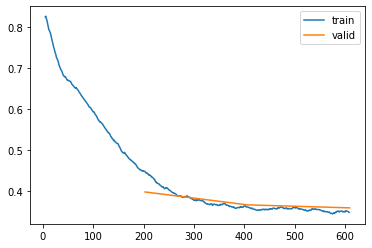

In [301]:
learnB.model.embeds.state_dict()['0.weight']

In [302]:
learnC.model.embeds.state_dict()['0.weight']

tensor([[-0.0025, -0.0001,  0.0085,  0.0028, -0.0135, -0.0182],
        [-0.0252, -0.0240,  0.0129,  0.0063, -0.0062,  0.0391],
        [ 0.0500, -0.0444, -0.0351, -0.0512,  0.0358, -0.0454],
        [ 0.0057, -0.0137,  0.0091,  0.0248, -0.0149,  0.0259],
        [-0.0041, -0.0350,  0.0048,  0.0228, -0.0019,  0.0280],
        [ 0.0021, -0.0030, -0.0157,  0.0122,  0.0337,  0.0236],
        [ 0.0267, -0.0048, -0.0365, -0.0494,  0.0287, -0.0449],
        [-0.0310,  0.0777,  0.0589, -0.0164, -0.0315,  0.0126],
        [-0.0133,  0.0111,  0.0324, -0.0085, -0.0262,  0.0413],
        [-0.0146,  0.0518,  0.0392,  0.0413, -0.0381,  0.0356]])

In [303]:
torch.save(learnB.model.state_dict(),"../results/exp1a/modelB_state_dict")
torch.save(learnC.model.state_dict(),"../results/exp1a/modelC_state_dict")

In [304]:
wandb.finish()